In [326]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [339]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

sigmoid_vector = np.vectorize(sigmoid)

normalize_data = True
def normalize(x):
    x_mean = np.mean(x, axis=0)
    x_std = np.std(x, axis=0)
    if(normalize_data):
        return (x-x_mean)/(x_std)
    else:
        return x

a_train = np.loadtxt("classificationA.train")
a_test = np.loadtxt("classificationA.test")

b_train = np.loadtxt("classificationB.train")
b_test = np.loadtxt("classificationB.test")

c_train = np.loadtxt("classificationC.train")
c_test = np.loadtxt("classificationC.test")

a_train_x = a_train[:, :2]
a_train_y = a_train[:, 2].reshape([-1, 1])
a_test_x = a_test[:, :2]
a_test_y = a_test[:, 2].reshape([-1, 1])

b_train_x = b_train[:, :2]
b_train_y = b_train[:, 2].reshape([-1, 1])
b_test_x = b_test[:, :2]
b_test_y = b_test[:, 2].reshape([-1, 1])

c_train_x = c_train[:, :2]
c_train_y = c_train[:, 2].reshape([-1, 1])
c_test_x = c_test[:, :2]
c_test_y = c_test[:, 2].reshape([-1, 1])

train_sets = {
    "A": [normalize(a_train_x), a_train_y],
    "B": [normalize(b_train_x), b_train_y],
    "C": [normalize(c_train_x), c_train_y],
}

test_sets = {
    "A": [normalize(a_test_x), a_test_y],
    "B": [normalize(b_test_x), b_test_y],
    "C": [normalize(c_test_x), c_test_y],
}

print ("All three datasets loaded successfully.")

All three datasets loaded successfully.


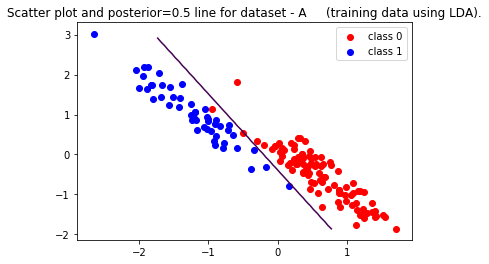

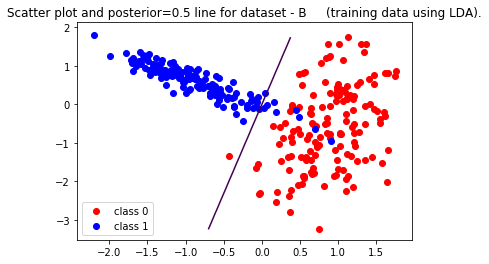

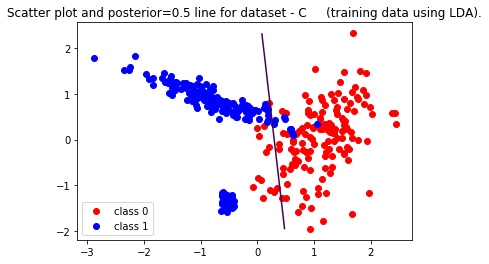

In [343]:
# Q1.(c)
def lda_mle(x, y):
    pi_mle = np.sum(y)/y.shape[0]
    
    x_class0 = x[np.where(y[:, 0] == 0)]
    x_class1 = x[np.where(y[:, 0] == 1)]
    
    mu_0_mle = np.mean(x_class0, axis=0).reshape([-1, 1])
    mu_1_mle = np.mean(x_class1, axis=0).reshape([-1, 1])

    sigma_mle = 1/x.shape[0]  * \
        (np.cov(x_class0.T)*(x_class0.shape[0]-1) \
         + np.cov(x_class1.T)*(x_class1.shape[0]-1))

    return [pi_mle, mu_0_mle, mu_1_mle, sigma_mle]

def lda_posterior_1_vector(x, theta):
    pi, mu_0, mu_1, sigma = theta
    w = np.matmul(np.linalg.inv(sigma) , (mu_1 - mu_0))
    w_0 = math.log(pi/(1-pi)) - 0.5* \
        np.matmul(np.matmul((mu_1 - mu_0).T, np.linalg.inv(sigma)), (mu_1 + mu_0))
    
    return 1 / (1 + np.exp(-(np.matmul(x, w) + w_0))) # using the design matrix form

for dset in train_sets:
    x, y = [train_sets[dset][0], train_sets[dset][1]]
    
    # lda MLE parameters:
    theta = lda_mle(x, y)
    pi, mu_0, mu_1, sigma = theta
    
    # for point clouds -
    x_class0 = x[np.where(y[:, 0] == 0)]
    x_class1 = x[np.where(y[:, 0] == 1)]
    plt.scatter(x_class0[:, 0], x_class0[:, 1], c='r', label="class 0")
    plt.scatter(x_class1[:, 0], x_class1[:, 1], c='b', label="class 1")
    
    delta = 0.1
    x1_points = np.arange(min(x[:, 0]), max(x[:, 0]), delta)
    x2_points = np.arange(min(x[:, 1]), max(x[:, 1]), delta)
    x1_grid, x2_grid = np.meshgrid(x1_points, x2_points)
       
    z = np.block([x1_grid.reshape([x1_grid.size, 1]), \
                  x2_grid.reshape([x1_grid.size, 1])])
    plt.contour(x1_grid, x2_grid, \
                lda_posterior_1_vector(z, theta).reshape(x1_grid.shape), levels=[0.5])
        
    plt.title("Scatter plot and posterior=0.5 line for dataset - {} \
    (training data using LDA).".format(dset))
    plt.legend()
    plt.show()


For dataset A, w = [-663.49375374 -427.62309847], b = [-145.43197754]


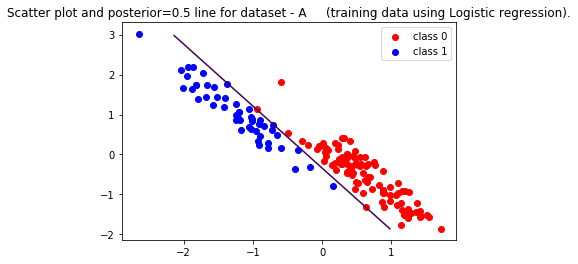

For dataset B, w = [-6.40208076  1.66919868], b = [1.37063238]


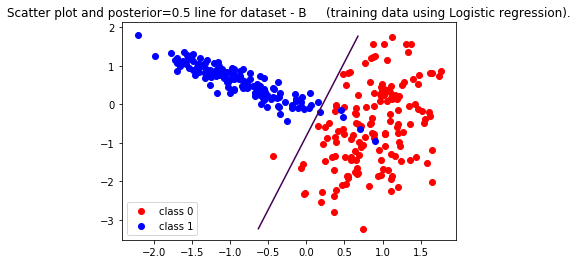

For dataset C, w = [-7.16983833  1.61782041], b = [2.05559857]


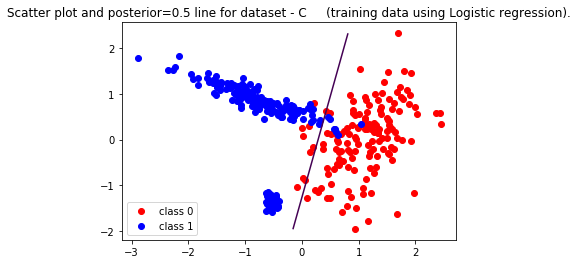

In [344]:
# Q.2 (a) and (b)

def logistic_reg(x, y):
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    x_t = x.T
    
    w = np.random.rand(x.shape[1],1)
    g_norm = float('inf')
    eps = 0.000001
    i=0
    while (g_norm > eps and i < 10000):
        i += 1
        mu = sigmoid(((w.T).dot(x_t)).T)
        mu_ii = mu*(1-mu)
        d = np.eye(mu.shape[0])*mu_ii
        h_inv = np.linalg.pinv( x_t.dot(d).dot(x) )
        g = x_t.dot(mu-y)
        w = w - h_inv.dot(g)
        g_norm = np.sum((g)**2)

#     print ("\nTerminated after {} iterations. \nw = {},\nb = {}" \
#        .format(i, w[:-1, :].flatten(), w[-1, :].flatten()))
    return w


for dset in train_sets:
    x, y = [train_sets[dset][0], train_sets[dset][1]]
    
    w = logistic_reg(x, y)
    # print ("For dataset {}, Weights = {}".format(dset, w.flatten()))
    print ("For dataset {}, w = {}, b = {}"\
           .format(dset, w[1:3, :].flatten(), w[0, :].flatten()))
    
    
    # for point clouds -
    x_class0 = x[np.where(y[:, 0] == 0)]
    x_class1 = x[np.where(y[:, 0] == 1)]
    plt.scatter(x_class0[:, 0], x_class0[:, 1], c='r', label="class 0")
    plt.scatter(x_class1[:, 0], x_class1[:, 1], c='b', label="class 1")
    

    delta = 0.02
    x1_points = np.arange(min(x[:, 0]), max(x[:, 0]), delta)
    x2_points = np.arange(min(x[:, 1]), max(x[:, 1]), delta)
    x1_grid, x2_grid = np.meshgrid(x1_points, x2_points)
    
    z = np.block([x1_grid.reshape([x1_grid.size, 1]), x2_grid.reshape([x1_grid.size, 1])])
    z = np.hstack((np.ones((z.shape[0], 1)), z))
    # then w_t.x = 0, then sigmoid(w_t.x) = 0.5
    plt.contour(x1_grid, x2_grid, z.dot(w).reshape(x1_grid.shape), levels=[0]) 
    
    plt.title("Scatter plot and posterior=0.5 line for dataset - {} \
    (training data using Logistic regression).".format(dset))
    plt.legend()
    plt.show()


For dataset A, w = [-0.80904298 -0.42515543], b = [0.33333333]


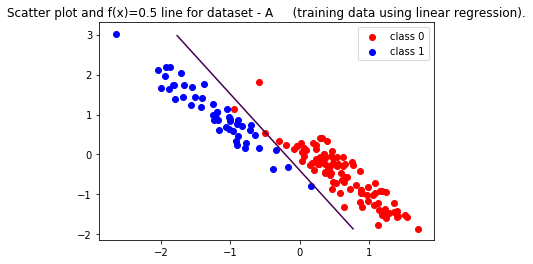

For dataset B, w = [-0.39138826  0.0844413 ], b = [0.5]


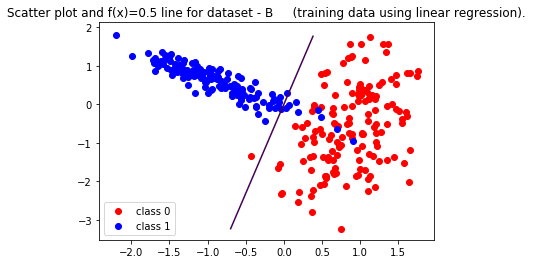

For dataset C, w = [-0.41554424 -0.0387799 ], b = [0.625]


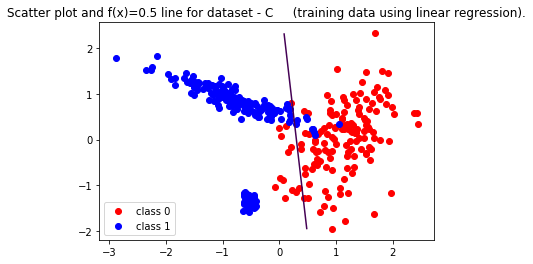

In [349]:
# Q. 3

def linear_reg(x, y):
    # Add a column for bias in x -
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    x_t = x.T
    
    w = (np.linalg.inv(x_t.dot(x))).dot(x_t).dot(y)
    return w


for dset in train_sets:
    x, y = [train_sets[dset][0], train_sets[dset][1]]
    
    w = linear_reg(x, y)
    # print ("For dataset {}, Weights = {}".format(dset, w.flatten()))
    print ("For dataset {}, w = {}, b = {}"\
           .format(dset, w[1:3, :].flatten(), w[0, :].flatten()))
    
    # for point clouds -
    x_class0 = x[np.where(y[:, 0] == 0)]
    x_class1 = x[np.where(y[:, 0] == 1)]
    plt.scatter(x_class0[:, 0], x_class0[:, 1], c='r', label="class 0")
    plt.scatter(x_class1[:, 0], x_class1[:, 1], c='b', label="class 1")
    

    delta = 0.02
    x1_points = np.arange(min(x[:, 0]), max(x[:, 0]), delta)
    x2_points = np.arange(min(x[:, 1]), max(x[:, 1]), delta)
    x1_grid, x2_grid = np.meshgrid(x1_points, x2_points)
    
    z = np.block([x1_grid.reshape([x1_grid.size, 1]), x2_grid.reshape([x1_grid.size, 1])])
    z = np.hstack((np.ones((z.shape[0], 1)), z))
    plt.contour(x1_grid, x2_grid, z.dot(w).reshape(x1_grid.shape), levels=[0.5])

    plt.title("Scatter plot and f(x)=0.5 line for dataset - {} \
    (training data using linear regression).".format(dset))
    plt.legend()
    plt.show()

In [350]:
# Q4 =======================

for dset in train_sets:
    print("================================== Dataset {} \
    ==================================".format(dset))
    x_train, y_train = [train_sets[dset][0], train_sets[dset][1]]
    x_test, y_test = [test_sets[dset][0], test_sets[dset][1]]
    
    x_train_b = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
    x_test_b = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
    
    print("------------- For LDA model -------------")
    # lda MLE parameters:
    theta_mle = lda_mle(x_train, y_train)    
    
    # predicition on training-set
    p_train = lda_posterior_1_vector(x_train, theta_mle) > 0.5
    train_error_count = np.sum(p_train != y_train)
    train_error_percent = 100 * train_error_count / y_train.shape[0]
    print("For dataset {0}, training points:\t error-count={1:3}, \
    error-percent={2:2.2f}".format(dset, train_error_count, train_error_percent))
    
    # predicition on test-set
    p_test = lda_posterior_1_vector(x_test, theta_mle) > 0.5
    test_error_count = np.sum(p_test != y_test)
    test_error_percent = 100 * test_error_count / y_test.shape[0]
    print("For dataset {0}, test points:\t error-count={1:3}, \
    error-percent={2:2.2f}".format(dset, test_error_count, test_error_percent))
    
    print("------------- For Logistic Regression -------------")
    # lda MLE parameters:
    w_logistic = logistic_reg(x_train, y_train)    
    
    # predicition on training-set
    
    p_train = x_train_b.dot(w_logistic) > 0
    train_error_count = np.sum(p_train != y_train)
    train_error_percent = 100 * train_error_count / y_train.shape[0]
    print("For dataset {0}, training points:\t error-count={1:3}, \
    error-percent={2:2.2f}".format(dset, train_error_count, train_error_percent))
    
    # predicition on test-set
    p_test = x_test_b.dot(w_logistic) > 0
    test_error_count = np.sum(p_test != y_test)
    test_error_percent = 100 * test_error_count / y_test.shape[0]
    print("For dataset {0}, test points:\t error-count={1:3}, \
    error-percent={2:2.2f}".format(dset, test_error_count, test_error_percent))
    
    print("------------- For Linear Regression -------------")
    # lda MLE parameters:
    w_linear = linear_reg(x_train, y_train)    
    
    # predicition on training-set
    p_train = x_train_b.dot(w_linear) > 0.5
    train_error_count = np.sum(p_train != y_train)
    train_error_percent = 100 * train_error_count / y_train.shape[0]
    print("For dataset {0}, training points:\t error-count={1:3}, \
    error-percent={2:2.2f}".format(dset, train_error_count, train_error_percent))
    
    # predicition on test-set
    p_test = x_test_b.dot(w_linear) > 0.5
    test_error_count = np.sum(p_test != y_test)
    test_error_percent = 100 * test_error_count / y_test.shape[0]
    print("For dataset {0}, test points:\t error-count={1:3}, \
    error-percent={2:2.2f}".format(dset, test_error_count, test_error_percent))
    

================================== Dataset A     ==================================
------------- For LDA model -------------
For dataset A, training points:	 error-count=  2,     error-percent=1.33
For dataset A, test points:	 error-count= 26,     error-percent=1.73
------------- For Logistic Regression -------------
For dataset A, training points:	 error-count=  0,     error-percent=0.00
For dataset A, test points:	 error-count= 61,     error-percent=4.07
------------- For Linear Regression -------------
For dataset A, training points:	 error-count=  2,     error-percent=1.33
For dataset A, test points:	 error-count= 27,     error-percent=1.80
================================== Dataset B     ==================================
------------- For LDA model -------------
For dataset B, training points:	 error-count=  9,     error-percent=3.00
For dataset B, test points:	 error-count= 89,     error-percent=4.45
------------- For Logistic Regression -------------
For dataset B, training po

For dataset A, numerical vaues of QDA parameters are:
 pi = 0.3333333333333333, 
 mu_0 = [[ 0.60826506]
 [-0.51411204]], 
 mu_1 = [[-1.21653013]
 [ 1.02822407]], 
 sigma_0 = [[ 0.24605036 -0.29955696]
 [-0.29955696  0.44221533]], 
 sigma_1 = [[ 0.28798095 -0.37201417]
 [-0.37201417  0.52970223]]


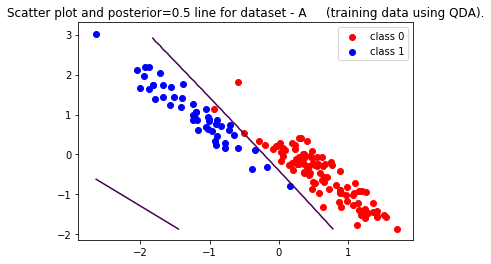

For dataset B, numerical vaues of QDA parameters are:
 pi = 0.5, 
 mu_0 = [[ 0.87327697]
 [-0.58835525]], 
 mu_1 = [[-0.87327697]
 [ 0.58835525]], 
 sigma_0 = [[0.18011076 0.17385184]
 [0.17385184 1.11353805]], 
 sigma_1 = [[ 0.2946639  -0.21801349]
 [-0.21801349  0.19413815]]


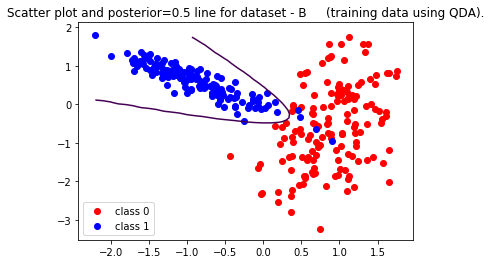

For dataset C, numerical vaues of QDA parameters are:
 pi = 0.625, 
 mu_0 = [[1.1015214 ]
 [0.03272764]], 
 mu_1 = [[-0.66091284]
 [-0.01963658]], 
 sigma_0 = [[0.27376061 0.16783529]
 [0.16783529 0.56214274]], 
 sigma_1 = [[ 0.27092822 -0.23737129]
 [-0.23737129  1.2616861 ]]


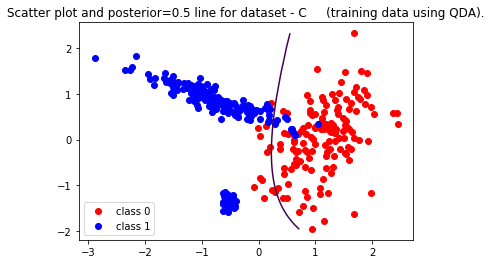

In [351]:
# Q. 5 (a)

def qda_mle(x, y):
    pi_mle = np.sum(y)/y.shape[0]
    
    x_class0 = x[np.where(y[:, 0] == 0)]
    x_class1 = x[np.where(y[:, 0] == 1)]
    
    mu_0_mle = np.mean(x_class0, axis=0).reshape([-1, 1])
    mu_1_mle = np.mean(x_class1, axis=0).reshape([-1, 1])

    sigma_0_mle = np.cov(x_class0.T)*(x_class0.shape[0]-1)/x_class0.shape[0]
    sigma_1_mle = np.cov(x_class1.T)*(x_class1.shape[0]-1)/x_class1.shape[0]

    return [pi_mle, mu_0_mle, mu_1_mle, sigma_0_mle, sigma_1_mle]


# Q. 5 (b)

def qda_posterior_1_vector(x, theta):
    pi, mu_0, mu_1, sigma_0, sigma_1 = theta
    sigma_0_det = np.linalg.det(sigma_0)
    sigma_1_det = np.linalg.det(sigma_1)
    sigma_0_inv = np.linalg.inv(sigma_0)
    sigma_1_inv = np.linalg.inv(sigma_1)
    
    odds_prior = (1-pi)/pi
    # following uses design matrix form for x.
    exp_term_0 = np.sum(np.matmul((x - mu_0.T), sigma_0_inv) * (x - mu_0.T), axis=1)
    exp_term_1 = np.sum(np.matmul((x - mu_1.T), sigma_1_inv) * (x - mu_1.T), axis=1)
    odds_conditional = np.sqrt(sigma_1_det/sigma_0_det) * np.exp(-0.5 * (exp_term_0 - exp_term_1))
    
    return 1/(1 + odds_prior*odds_conditional).reshape(x.shape[0], 1)


for dset in train_sets:
    x, y = [train_sets[dset][0], train_sets[dset][1]]
    
    # qda MLE parameters:
    theta = qda_mle(x, y)
    pi, mu_0, mu_1, sigma_0, sigma_1 = theta
    print ("For dataset {}, numerical vaues of QDA parameters are:".format(dset))
    print (" pi = {}, \n mu_0 = {}, \n mu_1 = {}, \n sigma_0 = {}, \n sigma_1 = {}" \
           .format(pi, mu_0, mu_1, sigma_0, sigma_1))
    
    # for point clouds -
    x_class0 = x[np.where(y[:, 0] == 0)]
    x_class1 = x[np.where(y[:, 0] == 1)]
    plt.scatter(x_class0[:, 0], x_class0[:, 1], c='r', label="class 0")
    plt.scatter(x_class1[:, 0], x_class1[:, 1], c='b', label="class 1")
    

    delta = 0.1
    x1_points = np.arange(min(x[:, 0]), max(x[:, 0]), delta)
    x2_points = np.arange(min(x[:, 1]), max(x[:, 1]), delta)
    x1_grid, x2_grid = np.meshgrid(x1_points, x2_points)
    
    z = np.block([x1_grid.reshape([x1_grid.size, 1]), x2_grid.reshape([x1_grid.size, 1])])
    plt.contour(x1_grid, x2_grid, qda_posterior_1_vector(z, theta).reshape(x1_grid.shape), levels=[0.5])

    plt.title("Scatter plot and posterior=0.5 line for dataset - {} \
    (training data using QDA).".format(dset))
    plt.legend()
    plt.show()


In [352]:
# Q.5 (c)

for dset in train_sets:
    x_train, y_train = [train_sets[dset][0], train_sets[dset][1]]
    x_test, y_test = [test_sets[dset][0], test_sets[dset][1]]
    
    print("------------- For QDA model -------------")
    # qda MLE parameters:
    theta_mle = qda_mle(x_train, y_train)    
    
    # predicition on training-set
    p_train = qda_posterior_1_vector(x_train, theta_mle) > 0.5
    train_error_count = np.sum(p_train != y_train)
    train_error_percent = 100 * train_error_count / y_train.shape[0]
    print("For dataset {0}, training points:\t error-count={1:3}, \
    error-percent={2:2.2f}".format(dset, train_error_count, train_error_percent))
    
    # predicition on test-set
    p_test = qda_posterior_1_vector(x_test, theta_mle) > 0.5
    test_error_count = np.sum(p_test != y_test)
    test_error_percent = 100 * test_error_count / y_test.shape[0]
    print("For dataset {0}, test points:\t error-count={1:3}, \
    error-percent={2:2.2f}".format(dset, test_error_count, test_error_percent))
    

------------- For QDA model -------------
For dataset A, training points:	 error-count=  1,     error-percent=0.67
For dataset A, test points:	 error-count= 33,     error-percent=2.20
------------- For QDA model -------------
For dataset B, training points:	 error-count=  4,     error-percent=1.33
For dataset B, test points:	 error-count= 38,     error-percent=1.90
------------- For QDA model -------------
For dataset C, training points:	 error-count= 21,     error-percent=5.25
For dataset C, test points:	 error-count=102,     error-percent=3.40
